** Web scrapping. Ejemplo 2: Tratamiento perezoso de un fichero **

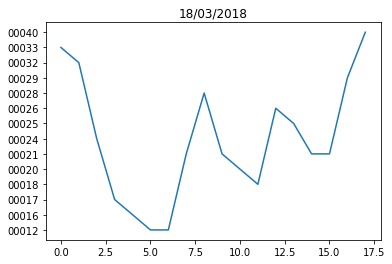

In [3]:
%matplotlib inline
import requests
from contextlib import closing
import csv
import codecs
import matplotlib.pyplot as plt


url = "http://www.mambiente.munimadrid.es/opendata/horario.txt"

with closing(requests.get(url, stream=True)) as r:
    reader = csv.reader(codecs.iterdecode(r.iter_lines(), 'utf-8'), 
                        delimiter=',', quotechar='"')
    for row in reader:
         if (row[0]+row[1]+row[2]=='28079004' and row[3]=='12'):
            plt.title(row[8]+"/"+row[7]+"/"+row[6])
            hora = 0
            desp = 9
            vs = []
            while (hora<=23 and row[desp+2*hora+1]=='V'):
                vs.append(row[desp+2*hora])
                hora +=1
            plt.plot(range(hora), vs) 
            plt.show()

Rafael Caballero, Enrique Martín y Adrián Riesco